### Importing libraries and data

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# Data
path = r'/Users/jennyfevik/Desktop/Data'

In [4]:
df_border = pd.read_csv(os.path.join(path, 'Prepared', 'Border_Regression.csv'),index_col=0)

In [5]:
df_border.head()

,Port Name,State,Border,Crossing Method,Count of Crossing,Latitude,Longitude,Month,Year,Count Category,State Total,Month Code,Month Total
0,Del Rio,Texas,US-Mexico Border,Trucks,5823,29.327,-100.928,Feb,2023,Low Crossings,4076706895,1.0,822883011
2,Skagway,Alaska,US-Canada Border,Pedestrians,1,59.630,-135.164,Feb,2023,Low Crossings,15399123,1.0,822883011
3,Brownsville,Texas,US-Mexico Border,Trains,70,25.952,-97.401,Feb,2023,Low Crossings,4076706895,1.0,822883011
4,Sault Sainte Marie,Michigan,US-Canada Border,Truck Containers Loaded,2322,46.509,-84.361,Feb,2023,Low Crossings,812680737,1.0,822883011
5,Lukeville,Arizona,US-Mexico Border,Pedestrians,6383,31.880,-112.817,Feb,2023,Low Crossings,1008310869,1.0,822883011


In [6]:
# subsetting df to just numerical variables
df_sub = df_border[['Count of Crossing', 'Latitude', 'Longitude', 'Year']]

In [7]:
df_sub.head()

,Count of Crossing,Latitude,Longitude,Year
0,5823,29.327,-100.928,2023
2,1,59.630,-135.164,2023
3,70,25.952,-97.401,2023
4,2322,46.509,-84.361,2023
5,6383,31.880,-112.817,2023


### Elbow Technique

In [8]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [9]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]
score

/Users/jennyfevik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jennyfevik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jennyfevik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jennyfevik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[-8467663941412207.0,
 -2924092575238914.0,
 -1357759229489110.5,
 -827977870539336.0,
 -526139089614548.75,
 -377246795544616.6,
 -269920386579640.66,
 -210107766580674.28,
 -164659297101917.5]

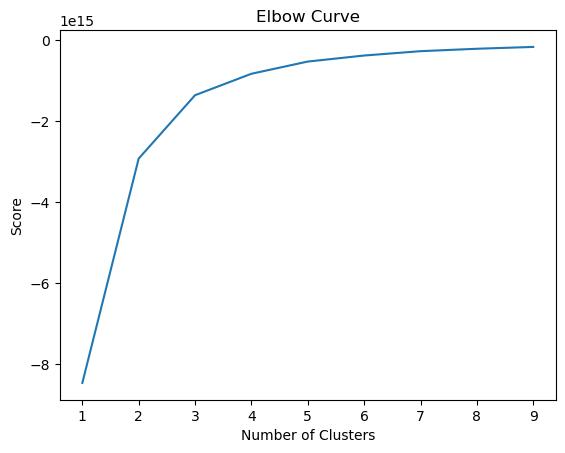

In [10]:
# Plotting elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The line goes up sharply till 3, then curves some, and then begins straightening out at 4. 3 is likely the optimal number of clusters, no more than 4 max.

### k-means clustering

In [11]:
# k-means object.
kmeans = KMeans(n_clusters = 3) 

In [12]:
# Fitting the k-means object to the data.

kmeans.fit(df_sub)

/Users/jennyfevik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [13]:
# creating new column for clusters
df_sub['clusters'] = kmeans.fit_predict(df_sub)

/Users/jennyfevik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/z2/0zshgjn917v11pctr85j0spw0000gn/T/ipykernel_73880/386840786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [14]:
df_sub.head()

,Count of Crossing,Latitude,Longitude,Year,clusters
0,5823,29.327,-100.928,2023,0
2,1,59.630,-135.164,2023,0
3,70,25.952,-97.401,2023,0
4,2322,46.509,-84.361,2023,0
5,6383,31.880,-112.817,2023,0


In [15]:
df_sub['clusters'].value_counts()

0    251924
1      8385
2      1519
Name: clusters, dtype: int64

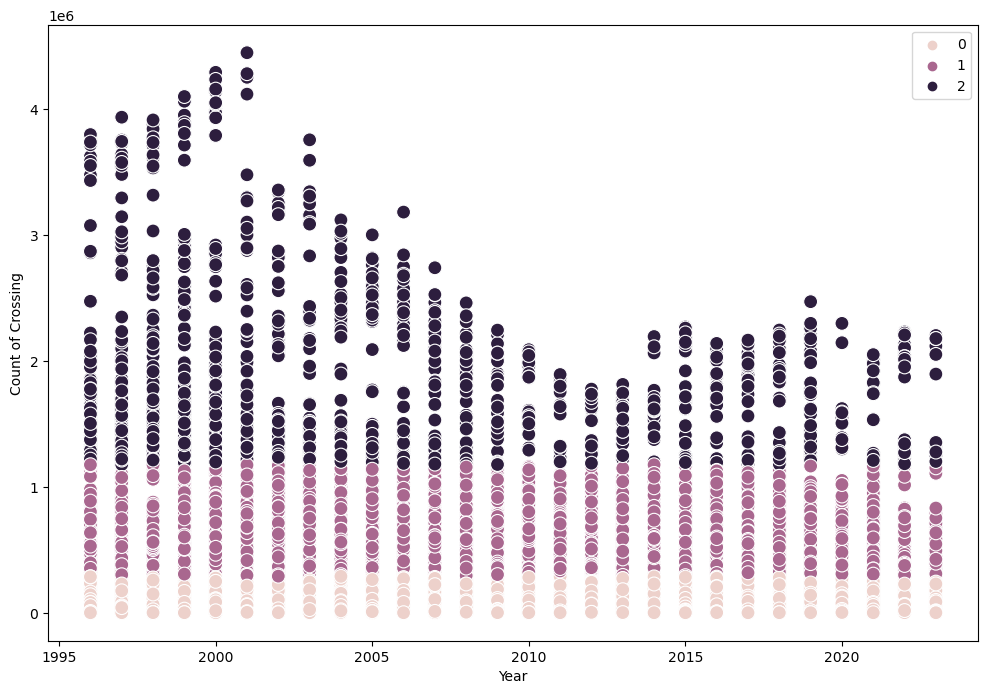

In [16]:
# Ploting the clusters for "Count of Crossing" and "Year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Year'], y=df_sub['Count of Crossing'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Year')
plt.ylabel('Count of Crossing')
plt.show()

This scatterplot looks almost exactly like the scatterplot that was created using high, medium, and low categories for crossing counts.

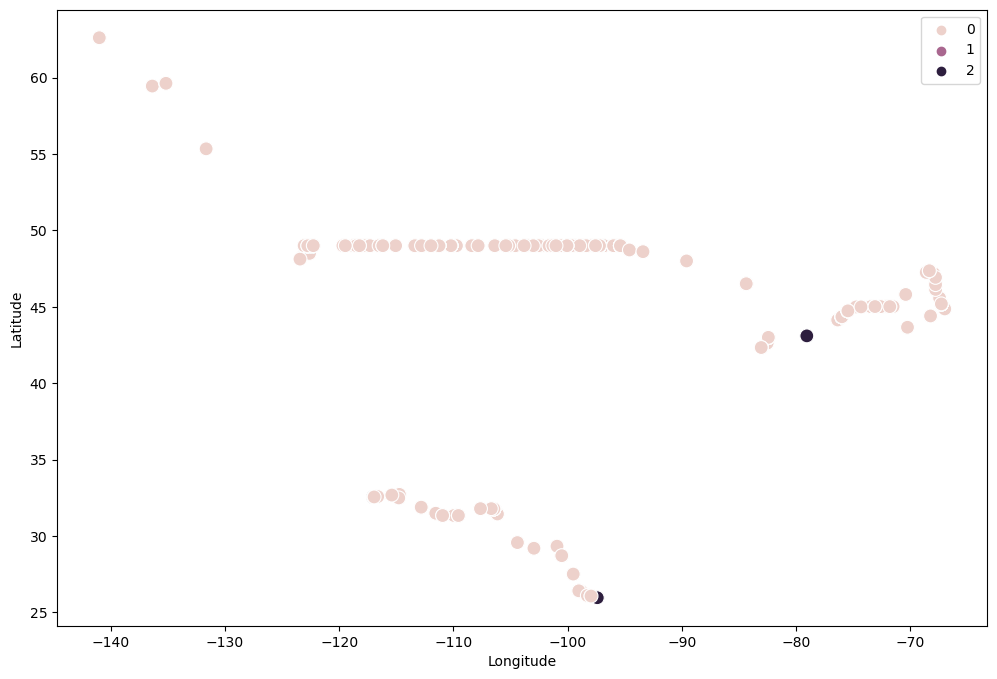

In [17]:
# Ploting the clusters for "Longitude" and "Latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Longitude'], y=df_sub['Latitude'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

There are a lot of clusters along a specific Latitude line, but spanning different longitudes. This shows how crossings are clusters in specific areas, but doesn't tell us what those locations are. 

In [18]:
# Creating descriptive statistics for the clusters
df_sub.groupby('clusters').agg({'Count of Crossing':['mean', 'median'], 
                         'Latitude':['mean', 'median'], 
                         'Longitude':['mean', 'median'],
                          'Year':['mean', 'median']})

Count of Crossing              Latitude           Longitude           \
                      mean     median       mean  median        mean   median   
clusters                                                                        
0             1.392919e+04      826.0  43.889770  47.249  -98.509904 -100.512   
1             5.646633e+05   524333.0  33.351126  32.485 -104.622654 -106.451   
2             1.786136e+06  1577527.0  32.085645  31.764 -105.706479 -106.451   

                 Year          
                 mean  median  
clusters                       
0         2009.174318  2009.0  
1         2008.827191  2009.0  
2         2005.163924  2003.0

I don't really find any of this information useful in future steps for this analytical process.